

# Project: Explanatory Data Analysis



<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 11,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling






In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [4]:
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
tmdb_df.shape


(10866, 21)

In [6]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
#Create a list of columns to be deleted
cols_to_del = ['id', 'imdb_id', 'revenue_adj','tagline', 'homepage', 'keywords', 'overview', 'production_companies','budget_adj','director']

# delete irrevelant columns 
tmdb_df = tmdb_df.drop(cols_to_del,1)
tmdb_df.tail()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,80,Action|Comedy,11/2/66,22,5.4,1966
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,74,Horror,11/15/66,15,1.5,1966


In [9]:
#Drop duplicates
tmdb_df.drop_duplicates(keep = 'first',inplace=True)
tmdb_df.shape

(10865, 11)

In [10]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1018.6+ KB


In [11]:
#Check the sun of null values in each column
tmdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [12]:
tmdb_df.dropna(inplace=True)

In [13]:
tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [14]:

tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])


In [15]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10767 non-null float64
budget            10767 non-null int64
revenue           10767 non-null int64
original_title    10767 non-null object
cast              10767 non-null object
runtime           10767 non-null int64
genres            10767 non-null object
release_date      10767 non-null datetime64[ns]
vote_count        10767 non-null int64
vote_average      10767 non-null float64
release_year      10767 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1009.4+ KB


# <a id='eda'></a>
# Explanatory Data Analysis

  







# Which movie genre are the most popular ?

In [16]:
#function takes in any column then keeps track of it. 
def seperate(col_name):
    #this take a column, and separates with '|'
    seperate = tmdb_df[col_name].str.cat(sep = '|')
    
    #using pandas series and storing the values separately
    seperate = pd.Series(seperate.split('|'))
    
    #The result will be in descending order so that the first element is the most frequently element.
    frequency = seperate.value_counts(ascending = False)
    
    return frequency

In [17]:
#calls the divide function to seperate and store genres in a variable
genres = seperate('genres')
#printing values
genres

Drama              4752
Comedy             3785
Thriller           2905
Action             2381
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Science Fiction    1227
Family             1219
Fantasy             911
Mystery             809
Animation           669
Documentary         478
Music               405
History             331
War                 268
Foreign             187
TV Movie            167
Western             165
dtype: int64

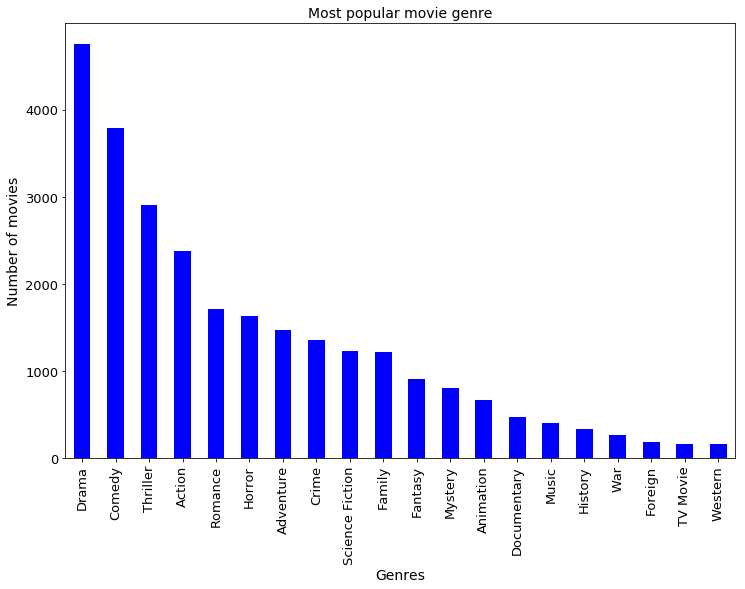

In [18]:
 #plot
gen_bar = genres.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
gen_bar.figure.set_size_inches(12, 8);

#Add labels
plt.title('Most popular movie genre', color = 'black', fontsize = '14')
plt.xlabel('Genres', color = 'black', fontsize = '14')
plt.ylabel('Number of movies', color = 'black', fontsize = '14');

From the bar plot,we can see that Drama is the most popular movie with 4752 movies credited to this genre

# How many Movies are released each year ?

In [19]:
# Group by year then count the number of movies.
year_movie = tmdb_df.groupby('release_year')['original_title'].count()
year_movie.tail()


release_year
2011    532
2012    576
2013    653
2014    687
2015    620
Name: original_title, dtype: int64

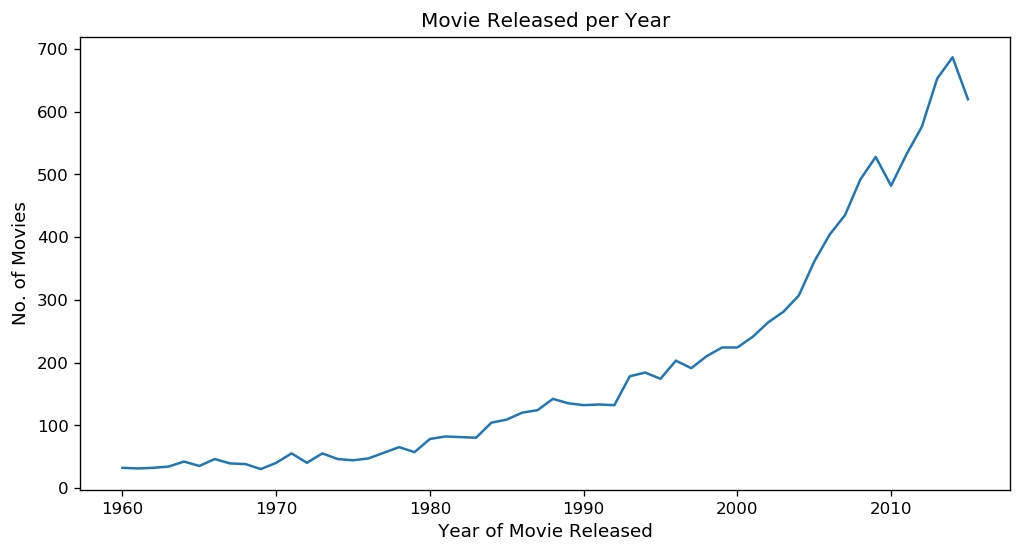

In [20]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Year of Movie Released', fontsize = 11)
# y-axis
plt.ylabel('No. of Movies', fontsize = 11)
# Title
plt.title('Movie Released per Year')

# Plot Line chart
plt.plot(year_movie)

# Display plot
plt.show()

The above plot shows there is a yearly increase in movie produced, with year 2014 showing the highest movie produced. And after 2015 there was a significant drop in movie produced.

# What is the Average runtime of the movies ?  

In [21]:
#Calculate the average runtime 
tmdb_df[['runtime']].mean()

runtime    102.413393
dtype: float64

Average runtime of movies is 102.413393

#   Does the runtime of the movies increase as the years goes by ?  

In [22]:
runtime_y= tmdb_df.groupby('release_year')['runtime'].mean()
print(runtime_y.head())

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
Name: runtime, dtype: float64


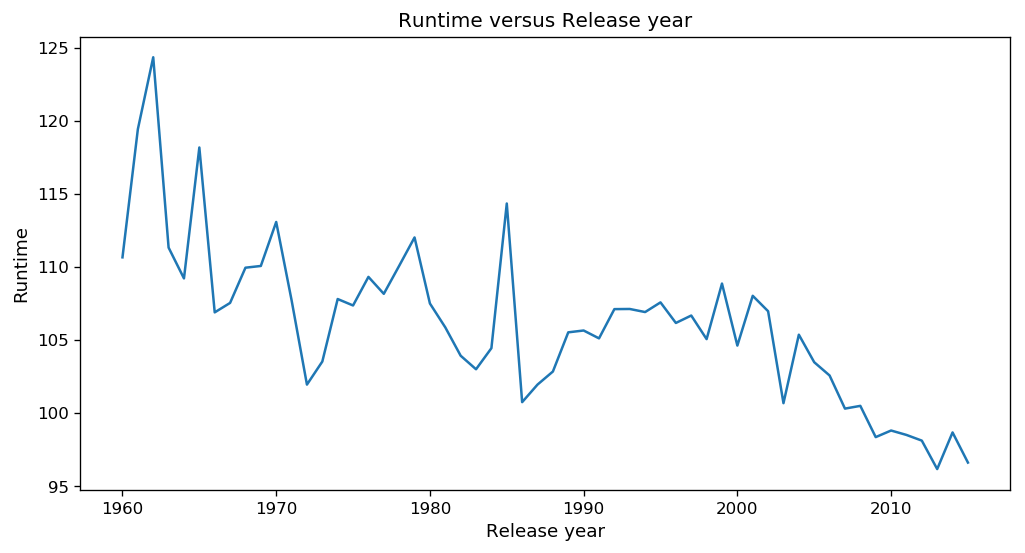

In [23]:
# Figure size(width, height)
plt.figure(figsize=(10,5), dpi = 120)

# x-axis
plt.xlabel('Release year', fontsize = 11)
# y-axis
plt.ylabel('Runtime', fontsize = 11)
# Title
plt.title('Runtime versus Release year')

# Plot Line chart
plt.plot(runtime_y)

# Display plot
plt.show()

There is a sharp decline in the runtime of movies from 1960 to 2015

<a id='conclusions'></a>
## Conclusions
1. Drama is the most popular movie with 4752 movies credited to this genre 
2.  There is a yearly increase in movie produced, with year 2014 showing the highest movie produced. And after 2015 there was a significant drop in movie produced.
3. Average runtime of movies is 102.413393 minutes
4. There is a sharp decline in the runtime of movies from 1960 to 2015.

## Limitations 

1.  We are not sure if the data provided to us is completel corect and up-to-date.
2. In the process of dropping null values, key data might have been lost.
 



In [ ]:
!jupyter nbconvert Explanatory_Data_Analysis.ipynb --to slides --post serve  --no-input --no-prompt